<a href="https://colab.research.google.com/github/bhagyashree-ds/bhagyashree-ds/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aim :** Salary Estimation Using K- Nearest Neighbour Model

**Requirement :** Google Colaboratory 

### Importing Basic libraries 

In [ ]:
import pandas as pd
import numpy as np

### Choose Dataset file from local files and import it

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving salary.csv to salary.csv


In [ ]:
d = pd.read_csv('salary.csv')

In [ ]:
print(d.shape)
print(d.head(3))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K


### Converting income variables into integer (<=50 as 0 & >=50 as 1)

In [ ]:
income_set = set(d['income'])
d['income'] = d['income'].map({'<=50K':0, '>50K':1}).astype(int)
print(d.head())

   age  education.num  capital.gain  hours.per.week  income
0   90              9             0              40       0
1   82              9             0              18       0
2   66             10             0              40       0
3   54              4             0              40       0
4   41             10             0              40       0


### Splitting the columns into independent & dependent variables

In [ ]:
X = d.iloc[:, :-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [ ]:
Y = d.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

### split into train & test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25,random_state=0)

# Feature Scaling
### we scale our data to make all the features contribute equally to the result

### Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data

### Transform - Transform method is transforming all the features using the respective mean and variance.

### We want our test data to be a completely new and a surprise set for our model


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### To find best value of K (in range of 1 to 40)

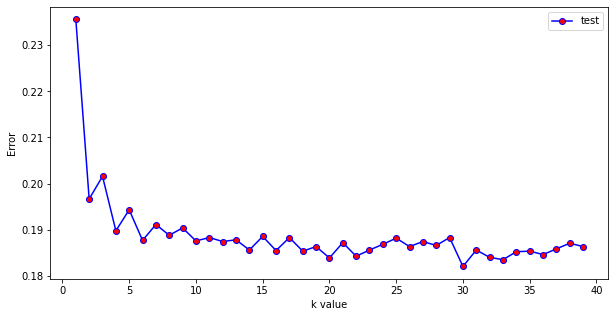

In [ ]:
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#calculating error for K values between 1 to 40
for k in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred1=knn.predict(x_test)
  error.append(np.mean(y_test!=y_pred1))

plt.figure(figsize=(10,5))
plt.plot(range(1,40),error,label="test",marker='o', markerfacecolor='r', color='blue')
plt.xlabel('k value')
plt.ylabel('Error')
plt.legend()


### Applying KNN algorithm with k=30

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 30, metric = 'minkowski', p = 2)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30)

### Prediction of model

In [ ]:
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Captital Gain: "))
wh = int(input("Enter New Employee's Hour's Per week: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Employee might get Salary above 50K")
else:
  print("Customer might not get Salary above 50K")

Enter New Employee's Age: 55
Enter New Employee's Education: 12
Enter New Employee's Captital Gain: 1
Enter New Employee's Hour's Per week: 50
[1]
Employee might get Salary above 50K


### Measuring the accuracy of model using Confusion Matrix


In [ ]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred1)
print(cm)
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train ,y_train)
y_pred1 = knn.predict(x_test)
metrics.accuracy_score(y_test,y_pred1)

[[5875  318]
 [1164  784]]


0.8179584817589977

**Conclusion :** 

*   with the best value of k =30 we implimented KNN algorithm.
*   By using confusion matrix we got the accuracy of 81.79%. 

